In [1]:
#TASK 1 - Install matplotlib and deap
#       - Import all necessary libraries



In [25]:
#SOLUTION
!pip install matplotlib deap

# Required Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [26]:
# # TODO: Task 2 - Define the number of locations and vehicles

# num_locations = # Define the number of locations (eg 10)

# locations = # Create a list of tuples representing location coordinates -
#             # try to use a random number generator
#             # (x, y) could be between 0 and 100

# depot = # Define the coordinates for the depot

# num_vehicles = # Define the number of vehicles - (eg 3)

In [27]:
#SOLUTION

num_locations = 20  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations

In [5]:
# # TASK 3 - Genetic Algorithm Setup
#        # - Figure out how to represent an individual OR encode an individual

# creator.create("FitnessMin", )
# creator.create("Individual", )

TypeError: create() missing 1 required positional argument: 'base'

In [6]:
# #TASK 4 - Starting with the toolbox and tools

# toolbox = base.Toolbox()
# toolbox.register("indices", random.sample, range(num_locations), num_locations)
# toolbox.register("individual", #finish defining how to build an individual)
# toolbox.register("population", #finish defining how to build an population)

SyntaxError: incomplete input (<ipython-input-6-74b7a34af842>, line 6)

In [7]:
#SOLUTION - TASK 3 and 4

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals


In [ ]:
# TASK 5 and 6

def evalVRP(individual):
    # TODO: Task 5 - Write the fitness evaluation function
    #              - Return (total distance, standard deviation)



#TASK 6 - Register the evaluate function in the toolbox

In [ ]:
# HINT CODE

def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle


        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(#finish code)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)

In [28]:
#SOLUTION CODE


#Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)

In [23]:
# TODO: Task 7 - Configure the genetic operators

toolbox.register("mate", # Choose and configure a crossover method)
toolbox.register("mutate", # Choose and configure a mutation method)
toolbox.register("select", # Choose and configure a selection method)

SyntaxError: incomplete input (<ipython-input-23-726fbd7180bd>, line 5)

In [ ]:
#HINTS

#Select is simpler, try tournament selection or roulette selection. Look up how to add that.

#FOR mutation - mutShuffleIndexes

#For mate - cxPartialyMatched, cxOrdered

In [29]:
#SOLUTION

toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [30]:

def plot_routes(individual, title="Routes"):
  plot.figure()
  for (x,y) in locations:
    plt.plot(x,y,'ko')
  for i in range(num_vehicles):
    vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
    plt.plot(*zip(*vehicle_route), 'r-')


    plt.title('vehicle_route')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
  print(plot_routes(tooolsbox.individual()))




9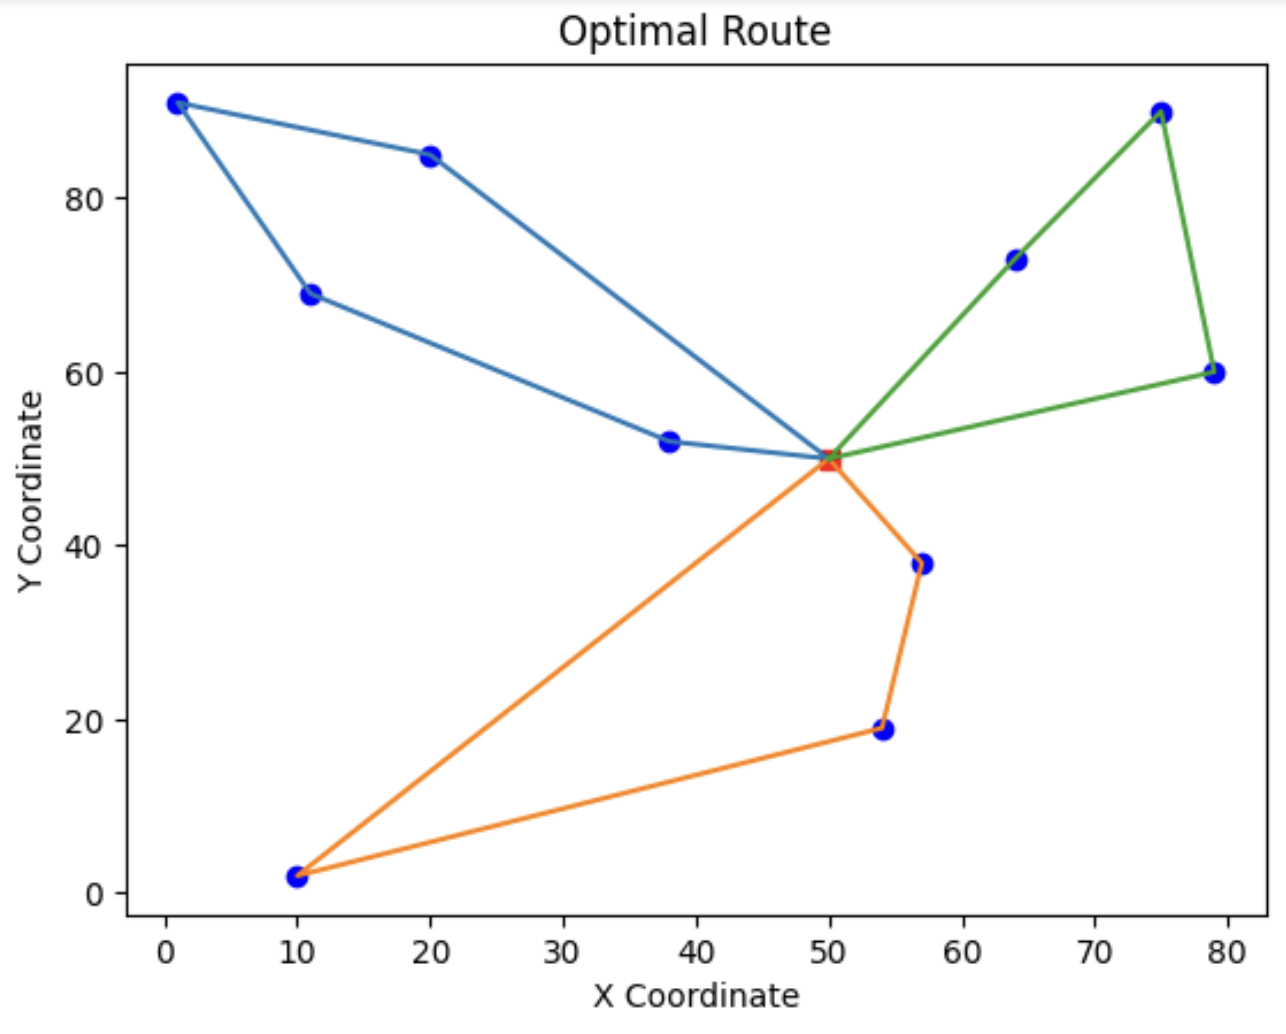

In [31]:
# SOLUTION - TASK 8
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	522.627	1.75419
1  	213   	499.596	2.5488 
2  	243   	491.596	2.71826
3  	232   	482.703	4.19879
4  	233   	477.579	3.58756
5  	218   	474.393	4.51301
6  	213   	467.853	3.30578
7  	233   	466.928	0.666873
8  	219   	461.05 	4.51301 
9  	209   	450.489	4.51301 
10 	224   	449.369	4.26095 
11 	230   	449.047	2.62704 
12 	230   	451.41 	1.77524 
13 	217   	439.032	4.5653  
14 	231   	435.846	3.62862 
15 	250   	426.308	4.41142 
16 	238   	405.156	4.25428 
17 	236   	378.978	3.09085 
18 	225   	361.155	4.74616 
19 	225   	350.75 	2.98485 
20 	209   	339.979	1.29759 
21 	232   	331.734	0.262557
22 	237   	327.275	1.29759 
23 	217   	327.506	1.18711 
24 	227   	322.94 	1.29759 
25 	246   	318.686	0.961746
26 	233   	311.933	0.961746
27 	219   	310.263	0.961746
28 	229   	309.924	0.578165
29 	223   	309.611	0.961746
30 	238   	307.711	1.75035 
31 	225   	305.765	0.961746
32 	221   	308.633	0.458864
33 	243   	303.846	6.54594 
34 	232   	301.439	5.59597 


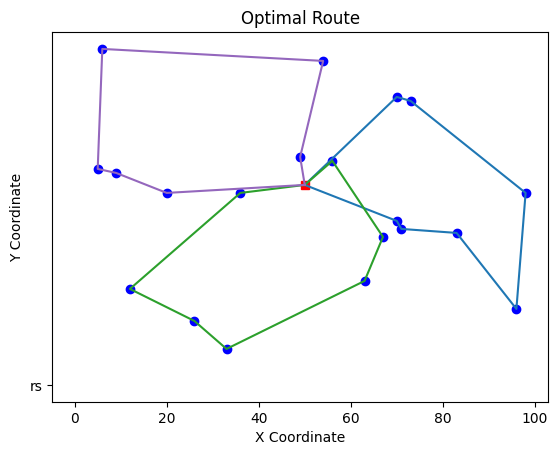

In [33]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()

In [ ]:
# Additional Tasks for the Vehicle Routing Project (Optional but highly recommended)

# 1. Parameter Tuning:
# Task: Vary parameters like population size, mutation rate, or tournament size. Analyze their impact on the results.
# Purpose: Learn the importance of parameter tuning in genetic algorithms and how it affects outcomes.

# 2. Fitness Score Analysis Over Generations:
# Task: Plot the fitness score of the best individual over generations for different configurations.
# Purpose: Visualize and understand the convergence behavior of the algorithm under different settings.

# 3. Solution Diversity Analysis:
# Task: Implement a method to measure and report the diversity of solutions in the population over time.
# Purpose: Explore the balance between exploration and exploitation in genetic algorithms.